In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import pandas as pd
import io
import numpy as np
from nltk.corpus import stopwords
from textblob import Word
import re
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from tkinter import *
from sklearn.metrics import confusion_matrix
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

df_train = pd.read_csv('/content/train.txt', names=['content', 'sentiment'], sep=';')
df_test = pd.read_csv('/content/test.txt', names=['content', 'sentiment'], sep=';')

data = pd.concat([df_train,df_test])

#Preprocessing includes making all letters as lower case, removing punctuations, removing stopwords and lemmatisation
def preprocess(text):
  text=text.apply(lambda x: " ".join(x.lower() for x in x.split()))
  text=text.str.replace('[^\w\s]',' ',regex=True)
  stop = stopwords.words('english')
  text= text.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
  text = text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

preprocess(data['content'])


#Correcting Letter Repetitions

def de_repeat(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)

data['content'] = data['content'].apply(lambda x: " ".join(de_repeat(x) for x in x.split()))

# Code to find the top 10,000 rarest words appearing in the data
freq = pd.Series(' '.join(data['content']).split()).value_counts()[-10000:]

# Removing all those rarely appearing words from the data
freq = list(freq.index)
data['content'] = data['content'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

#Encoding output labels
lbl_enc = preprocessing.LabelEncoder()
y = lbl_enc.fit_transform(data.sentiment.values)


# Splitting into training and testing data in 70:30 ratio
X_train, X_val, y_train, y_val = train_test_split(data.content.values, y, stratify=y, random_state=42, test_size=0.3, shuffle=True)

# Extracting TF-IDF parameters
tfidf = TfidfVectorizer(max_features=12000, analyzer='word',ngram_range=(1,3))
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.fit_transform(X_val)

# Extracting Count Vectors Parameters
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(data['content'])
X_train_count =  count_vect.transform(X_train)
X_val_count =  count_vect.transform(X_val)

#TF-IDF
# Model 1: Linear SVM
lsvm = SGDClassifier(alpha=0.0001, random_state=5, max_iter=5000, tol=None)
lsvm.fit(X_train_tfidf, y_train)
y_pred = lsvm.predict(X_val_tfidf)
print('svm using tfidf accuracy %s' % accuracy_score(y_pred, y_val))

# Model 2: Random Forest Classifier
rf = RandomForestClassifier(n_estimators=700)
rf.fit(X_train_tfidf, y_train)
y_pred = rf.predict(X_val_tfidf)
print('random forest tfidf accuracy %s' % accuracy_score(y_pred, y_val))

# Model 3: logistic regression
logreg = LogisticRegression(solver='liblinear', max_iter=5000)
logreg.fit(X_train_tfidf, y_train)
y_pred = logreg.predict(X_val_tfidf)
print('log reg tfidf accuracy %s' % accuracy_score(y_pred, y_val))


## Building models using count vectors feature
# Model 1: Linear SVM
lsvm = SGDClassifier(alpha=0.0001, random_state=5, max_iter=5000, tol=None, class_weight="balanced")
lsvm.fit(X_train_count, y_train)
y_pred = lsvm.predict(X_val_count)
print('lsvm using count vectors accuracy %s' % accuracy_score(y_pred, y_val))

# Model 2: Random Forest Classifier
rf = RandomForestClassifier(n_estimators=700)
rf.fit(X_train_count, y_train)
y_pred = rf.predict(X_val_count)
print('random forest with count vectors accuracy %s' % accuracy_score(y_pred, y_val))

# Model 3: Logistic Regression
logreg = LogisticRegression(solver='liblinear', max_iter=5000)
logreg.fit(X_train_count, y_train)
y_pred = logreg.predict(X_val_count)
print('log reg count vectors accuracy %s' % accuracy_score(y_pred, y_val))


svm using tfidf accuracy 0.31203703703703706
random forest tfidf accuracy 0.3042592592592593
log reg tfidf accuracy 0.33037037037037037
lsvm using count vectors accuracy 0.8835185185185185
random forest with count vectors accuracy 0.8605555555555555
log reg count vectors accuracy 0.8901851851851852


<Axes: >

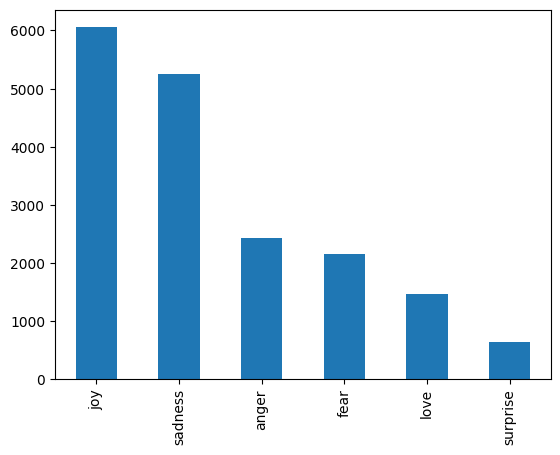

In [ ]:
data['sentiment'].value_counts().plot(kind='bar')

In [ ]:
logreg.classes_

array([0, 1, 2, 3, 4, 5])

In [ ]:
from ipywidgets import widgets
lb1=widgets.Label('Input Text:')
display(lb1)
text=widgets.Text()
display(text)
btn=widgets.Button(description="Predict")
display(btn)
lb2=widgets.Label()
display(lb2)
def predict(b):
  tweets = pd.DataFrame([text.value])
  # Doing some preprocessing on these tweets as done before
  tweets[0] = tweets[0].str.replace('[^\w\s]',' ',regex=True)
  from nltk.corpus import stopwords
  stop = stopwords.words('english')
  tweets[0] = tweets[0].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
  from textblob import Word
  tweets[0] = tweets[0].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
  # Extracting Count Vectors feature from our tweets
  tweet_count = count_vect.transform(tweets[0])
  # Predicting the emotion of the tweet using our already trained logistic regression
  tweet_pred = logreg.predict(tweet_count)
  if tweet_pred==0:
    str="ANGER 😡"
  elif tweet_pred==1:
    str="FEAR 😱"
  elif tweet_pred==2:
    str="JOY 😃"
  elif tweet_pred==3:
    str="LOVE 😍"
  elif tweet_pred==4:
    str="SADNESS 😞"
  else:
    str="SURPRISE 😯"
  lb2.value='Emotion = '+str
btn.on_click(predict)

Label(value='Input Text:')

Text(value='')

Button(description='Predict', style=ButtonStyle())

Label(value='')

In [ ]:
from sklearn.utils.multiclass import unique_labels

In [ ]:
def plot1(y_val,y_pred):
  labels=unique_labels(y_val)
  column=[f'Predicted {label}' for label in labels]
  indices=[f'Actual {label}' for label in labels]
  table=pd.DataFrame(confusion_matrix(y_val,y_pred),columns=column,index=indices)
  return table

In [ ]:
plot1(y_val,y_pred)

,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5
Actual 0,636,14,33,3,44,0
Actual 1,21,545,18,2,37,25
Actual 2,9,10,1706,56,26,10
Actual 3,3,2,97,328,9,0
Actual 4,38,22,48,6,1456,4
Actual 5,1,27,19,1,8,136


In [ ]:
import seaborn as sns

In [ ]:
def plot2(y_val,y_pred):
  labels=unique_labels(y_val)
  column=[f'Predicted {label}' for label in labels]
  indices=[f'Actual {label}' for label in labels]
  table=pd.DataFrame(confusion_matrix(y_val,y_pred),columns=column,index=indices)
  return sns.heatmap(table, annot=True, fmt='d', cmap='Blues')

<Axes: >

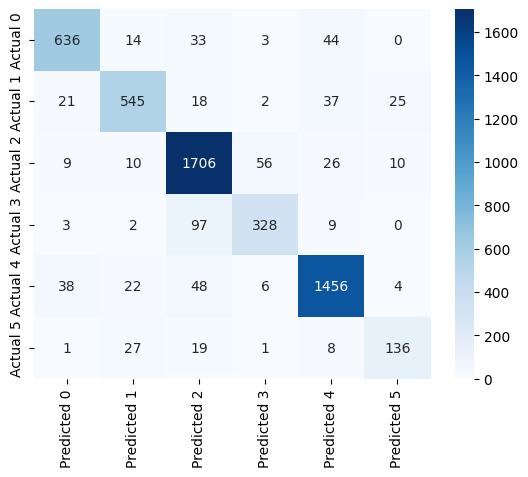

In [ ]:
plot2(y_val,y_pred)